## Computer Vision & Image Processing: **Mean Filtering**

*Submitted by:*

**Christian Elijah Darvin**

BCS32

College of Information and Computer Studies - De La Salle University Dasmariñas

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

print(f'NumPy Version: {np.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'OpenCV Version: {cv.__version__}')


NumPy Version: 1.26.4
Matplotlib Version: 3.9.2
OpenCV Version: 4.10.0


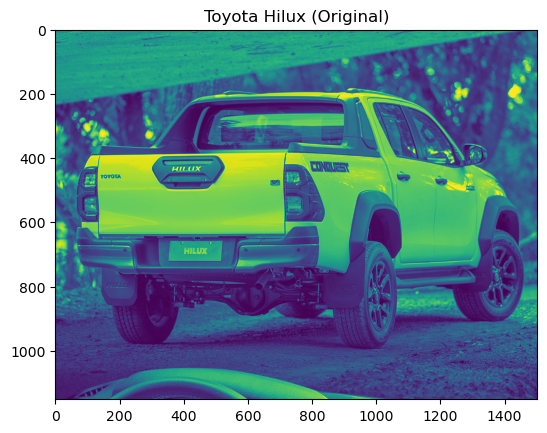

In [88]:
toyota_hilux_original = cv.imread('./images/toyota-hilux.png', 0)
plt.imshow(toyota_hilux_original)
plt.title('Toyota Hilux (Original)')
plt.show()

In [89]:
pixel_value = np.array([toyota_hilux_original])
print(f'Pixel Value: \n{pixel_value}')

Pixel Value: 
[[[134 126 125 ... 106 101  99]
  [130 143 146 ... 102  97  96]
  [131 120 126 ...  99  95  97]
  ...
  [ 20  20  19 ...  22  21  18]
  [ 19  20  20 ...  17  16  15]
  [ 18  19  20 ...  20  22  33]]]


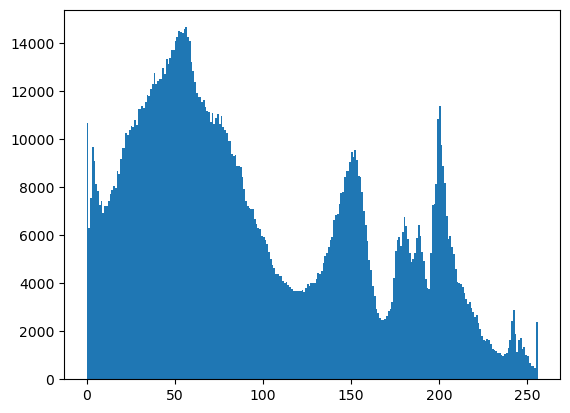

In [90]:
plt.hist(pixel_value.ravel(), 256, [0, 256])
plt.show()

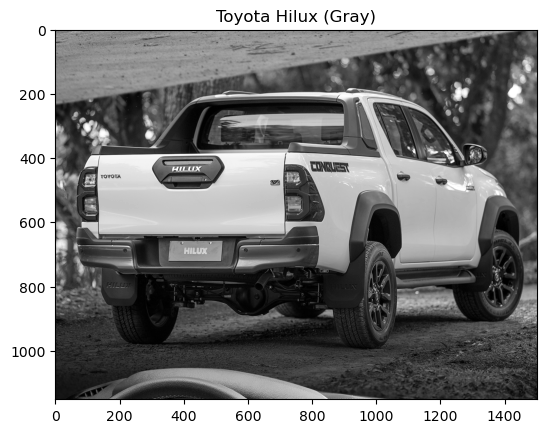

In [91]:
toyota_color_variation1 = toyota_hilux_original
plt.imshow(toyota_color_variation1, cmap='gray')
plt.title('Toyota Hilux (Gray)')
plt.show()

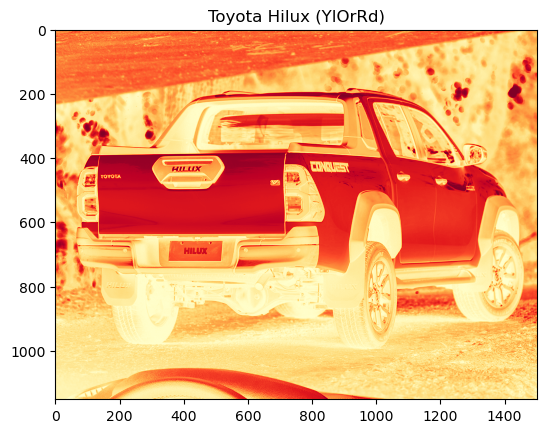

In [92]:
toyota_color_variation2 = toyota_hilux_original
plt.imshow(toyota_color_variation2, cmap='YlOrRd')
plt.title('Toyota Hilux (YlOrRd)')
plt.show()

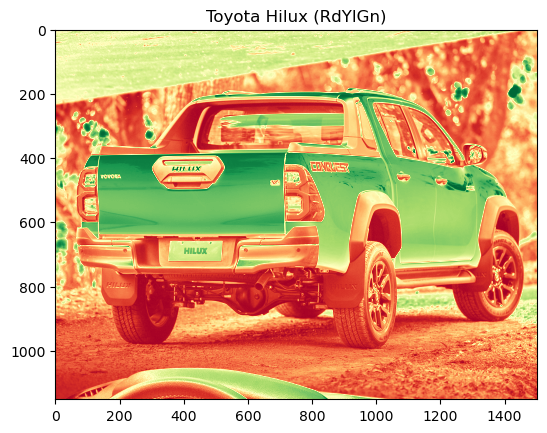

In [93]:
toyota_color_variation3 = toyota_hilux_original
plt.imshow(toyota_color_variation3, cmap='RdYlGn')
plt.title('Toyota Hilux (RdYlGn)')
plt.show()

In [94]:
def show(image):
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

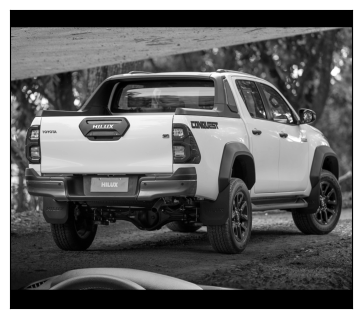

In [95]:
h, w = toyota_hilux_original.shape
img = np.zeros((h + 160,w), np.uint8)
img[80: -80, :] = toyota_hilux_original
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
show(img)

In [96]:
pixel_value_gray = np.array([img])
print(pixel_value_gray)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


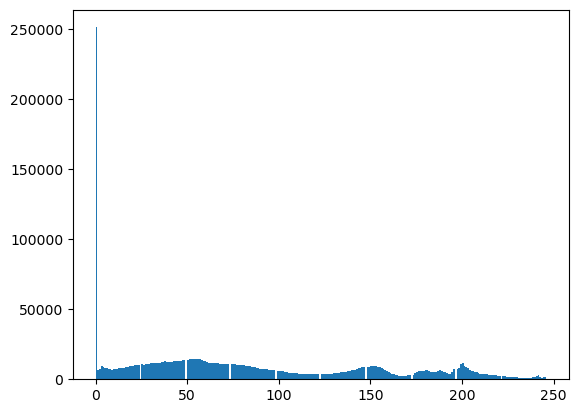

In [97]:
plt.hist(img.ravel(), 256, [0,246])
plt.show()

In [98]:
%pip install sewar

Note: you may need to restart the kernel to use updated packages.


In [99]:
from sewar import full_ref
from skimage import measure, metrics
from PIL import Image
# from google.colab.patches import cv2_imshow

In [100]:
mean_kernel = np.ones((3, 3),np.float32)/25
print(f'Mean Kernel: {mean_kernel}')

Mean Kernel: [[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]


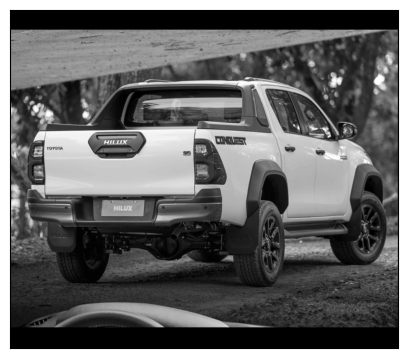

In [101]:
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

## 1st Image: Clear

In [102]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE (Based on Scikit-Image): {rmse_skimg}')

RMSE (Based on Scikit-Image): 0.6438697329757475


In [103]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE (Based on Scikit-Image): {mse_skimg}')

MSE (Based on Scikit-Image): 4931.135475492105


In [104]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR (Based on Scikit-Image): {psnr_skimg}')

PSNR (Based on Scikit-Image): 11.201334265885617


In [105]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print(f'SSIM (Based on Scikit-Image): {ssim_skimg}')

SSIM (Based on Scikit-Image): 0.5313335926019249


## 2nd Image: Blurry

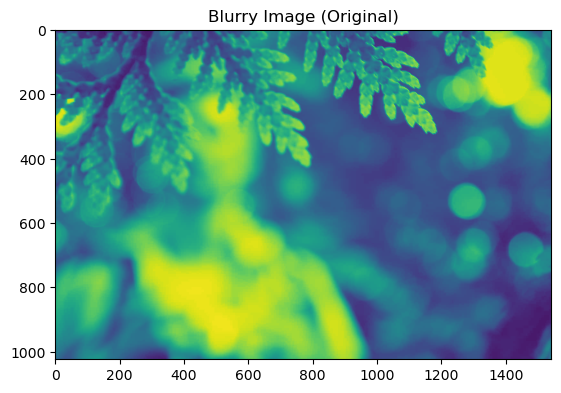

In [106]:
blurry_img = cv.imread('./images/blurry-img.jpg', 0)
plt.imshow(blurry_img)
plt.title('Blurry Image (Original)')
plt.show()

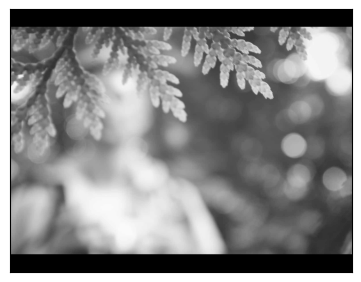

In [107]:
h, w = blurry_img.shape
img = np.zeros((h + 160,w), np.uint8)
img[80: -80, :] = blurry_img
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
show(img)

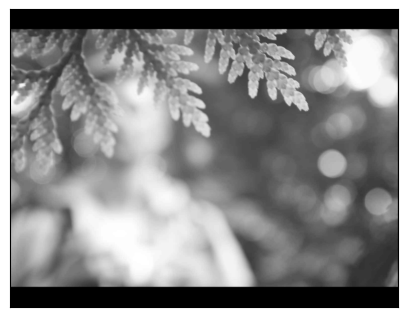

In [108]:
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

In [109]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE (Based on Scikit-Image): {rmse_skimg}')

RMSE (Based on Scikit-Image): 0.640364617762793


In [110]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE (Based on Scikit-Image): {mse_skimg}')

MSE (Based on Scikit-Image): 8076.671558413958


In [111]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR (Based on Scikit-Image): {psnr_skimg}')

PSNR (Based on Scikit-Image): 9.058479384135566


In [112]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print(f'SSIM (Based on Scikit-Image): {ssim_skimg}')

SSIM (Based on Scikit-Image): 0.6412171661755917


## 3rd Image: Light

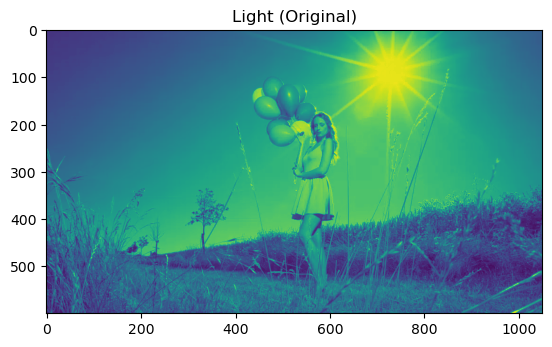

In [113]:
illumination_light = cv.imread('./images/light-img.png', 0)
plt.imshow(illumination_light)
plt.title('Light (Original)')
plt.show()

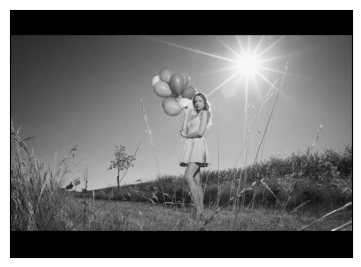

In [114]:
h, w = illumination_light.shape
img = np.zeros((h + 160,w), np.uint8)
img[80: -80, :] = illumination_light
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
show(img)

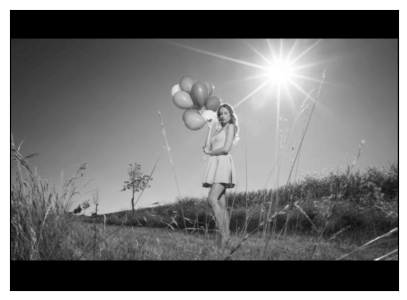

In [115]:
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

In [116]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE (Based on Scikit-Image): {rmse_skimg}')

RMSE (Based on Scikit-Image): 0.6426943240580983


In [117]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE (Based on Scikit-Image): {mse_skimg}')

MSE (Based on Scikit-Image): 5585.331763157895


In [118]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR (Based on Scikit-Image): {psnr_skimg}')

PSNR (Based on Scikit-Image): 10.660313859893357


In [119]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print(f'SSIM (Based on Scikit-Image): {ssim_skimg}')

SSIM (Based on Scikit-Image): 0.5795172515638752


## 4th Image: Dark

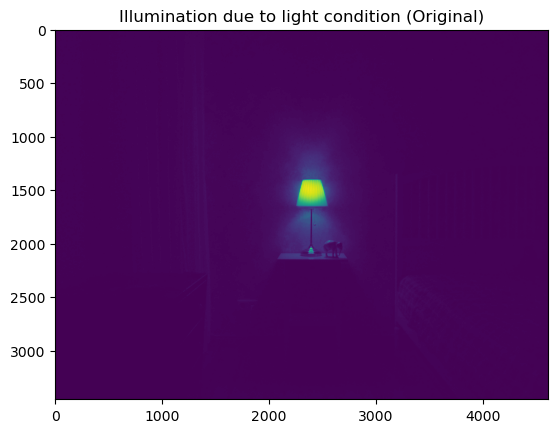

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:
dark_image = cv.imread('./images/dark-room.jpg', 0)
plt.imshow(dark_image)
plt.title('Illumination due to light condition (Original)')
plt.show()
print(dark_image)

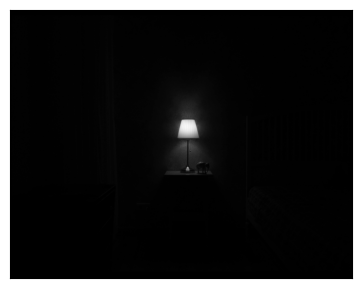

In [121]:
h, w = dark_image.shape
img = np.zeros((h + 160,w), np.uint8)
img[80: -80, :] = dark_image
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
show(img)

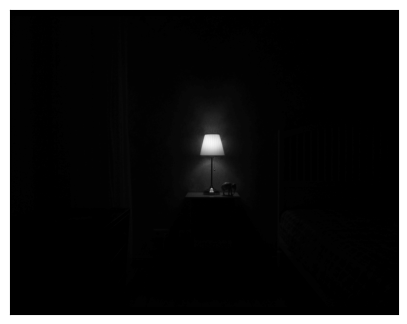

In [122]:
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

In [123]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE (Based on Scikit-Image): {rmse_skimg}')

RMSE (Based on Scikit-Image): 0.6403332668183854


In [124]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE (Based on Scikit-Image): {mse_skimg}')

MSE (Based on Scikit-Image): 71.38315068397785


In [125]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR (Based on Scikit-Image): {psnr_skimg}')

PSNR (Based on Scikit-Image): 29.594846480906888


In [126]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print(f'SSIM (Based on Scikit-Image): {ssim_skimg}')

SSIM (Based on Scikit-Image): 0.8639982506161896


## 5th Image: Uneven Lighting

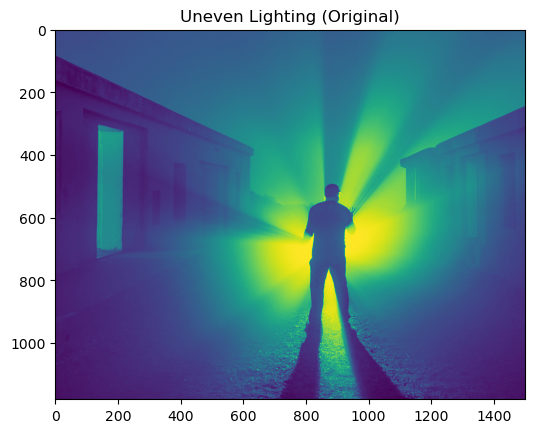

In [127]:
uneven_light = cv.imread('./images/uneven-light.jpg', 0)
plt.imshow(uneven_light)
plt.title('Uneven Lighting (Original)')
plt.show()

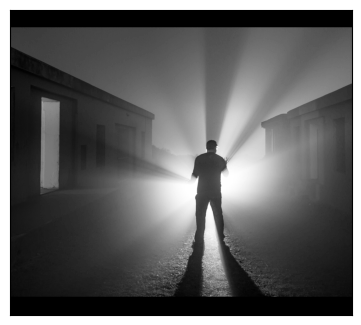

In [128]:
h, w = uneven_light.shape
img = np.zeros((h + 160,w), np.uint8)
img[80: -80, :] = uneven_light
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
show(img)

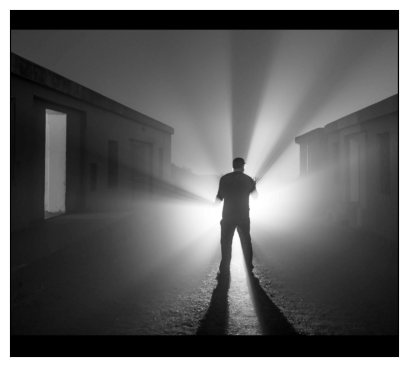

In [129]:
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

In [130]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE (Based on Scikit-Image): {rmse_skimg}')

RMSE (Based on Scikit-Image): 0.6406599928091479


In [131]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE (Based on Scikit-Image): {mse_skimg}')

MSE (Based on Scikit-Image): 4063.7547169154227


In [132]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR (Based on Scikit-Image): {psnr_skimg}')

PSNR (Based on Scikit-Image): 12.04152874265505


In [133]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print(f'SSIM (Based on Scikit-Image): {ssim_skimg}')

SSIM (Based on Scikit-Image): 0.6429435272046381
